<a href="https://colab.research.google.com/github/Alf-caput/LAB03_Clasificacion/blob/Ldev/Practica1LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PRÁCTICA 1 LAB 03: Técnicas y Modelos de Clasificación

A partir de datos sobre características de tumores, se desea llevar a cabo un Decision Support System para comprender las características que más influyen en el diagnóstico de cáncer de mama.

Un Decision Support System es un sistema computacional basado en minería de datos que brinda información para tomar una decisión.  

B = BENIGNO, M = MALIGNO

Primero se carga el dataset 'cancer.csv':

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Frecuencia por diagnóstico: es interesante evaluar esta frecuencia, pues la descompensación que pueda existir en cuántas veces aparezca una etiqueta repercute en nuestro modelo.

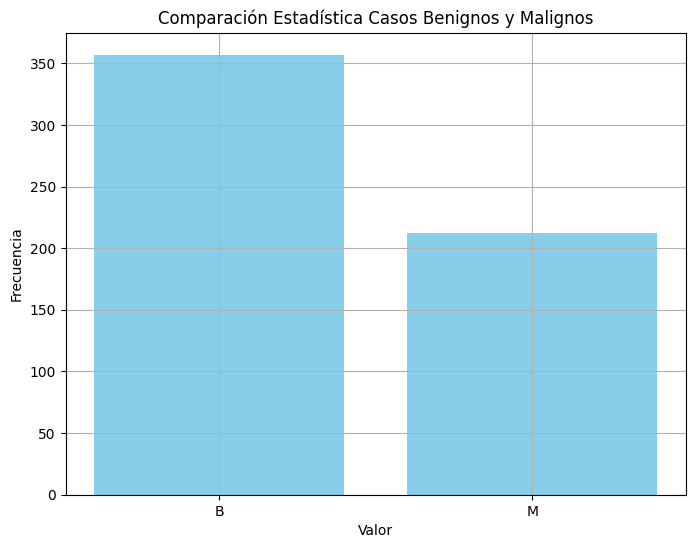

In [2]:
tabla_frecuencias = df['diagnosis'].value_counts().reset_index()
tabla_frecuencias.columns = ['Valor', 'Frecuencia']
plt.figure(figsize=(8, 6))
plt.bar(tabla_frecuencias['Valor'], tabla_frecuencias['Frecuencia'], color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación Estadística Casos Benignos y Malignos')
plt.grid(True)
plt.show()

Se puede ver que hay una gran cantidad de datos más de tumores benignos que malignos.  Hay aproximadamente una diferencia de un 57%.  Esto puede aumentar la posibilidad de falsos positivos.

A continuación se analizará la correlación cruzada, que brinda información sobre las relaciones entre las variables y su respectivo diagnóstico, es decir, sirve para observar qué variables tienen mayor influencia en el entrenamiento del modelo.

# 1) Preprocesamiento de los datos.

Analizar datos NaN:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Hay una columna, 'Unnamed', que contiene 32 datos nulos.  No hay información sobre ellos, y son pocos.  Se elimina dicha columna.



In [4]:
df = df.drop(columns = ['Unnamed: 32'])

Es relevante eliminar variables que sean muy dependientes de otras.  Se graficará un mapa de calor que indica la relación porcentual entre variables

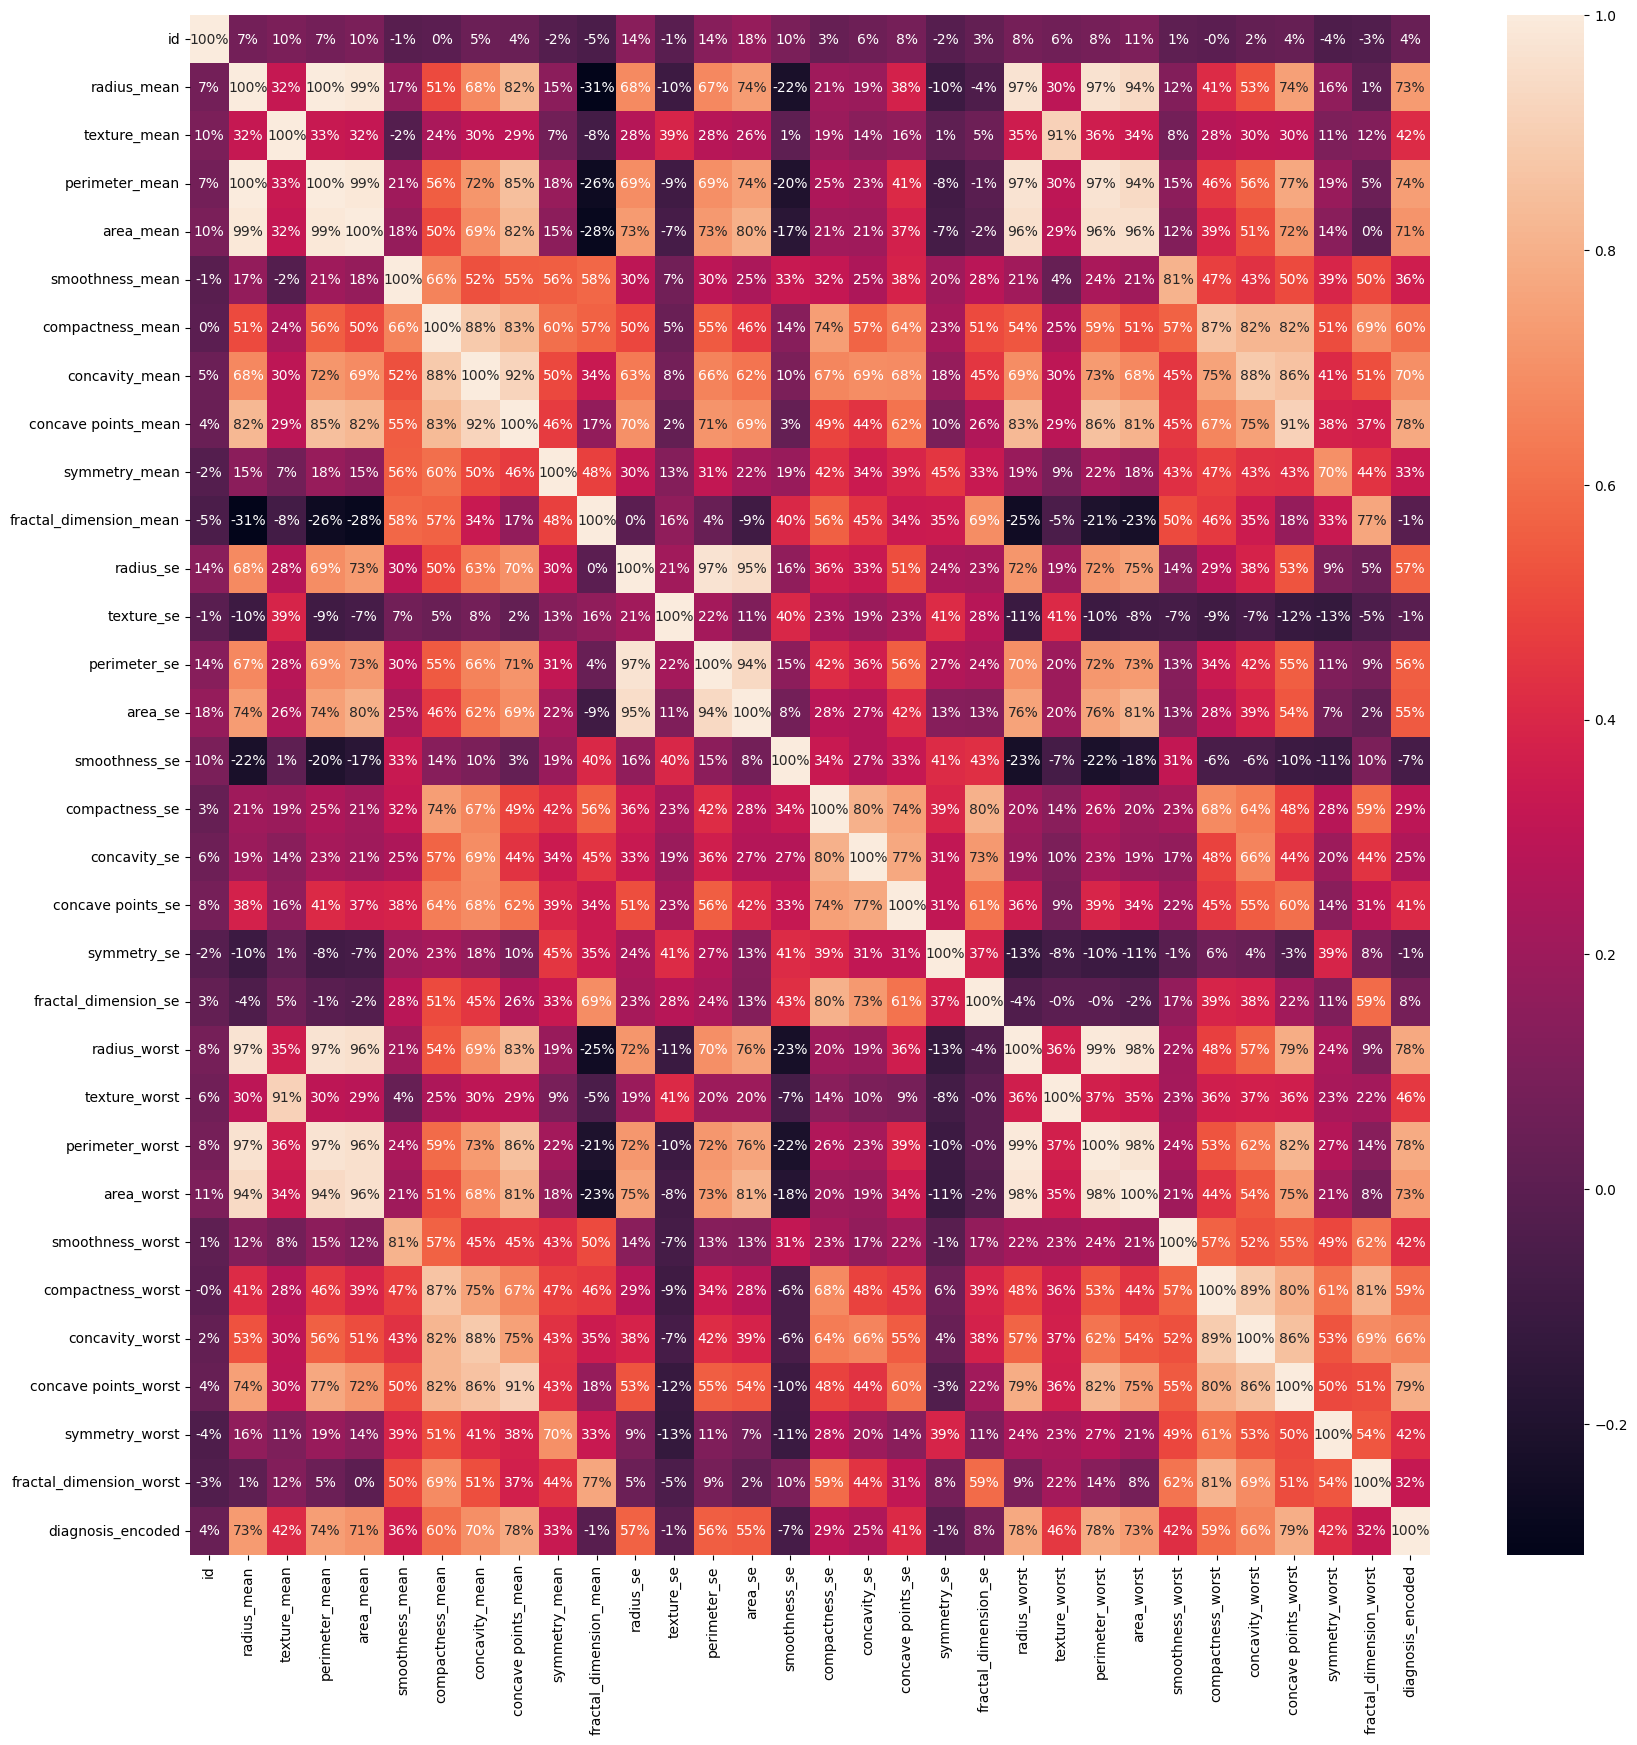

In [5]:
#convertir diagnosis a numérico
#suponer que M = 1, B = 0
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})
df_new = df.drop(columns = ['diagnosis'])

plt.figure(figsize=(20, 20))
sns_plot = sns.heatmap(df_new.corr(), annot=True, fmt='.0%')
plt.show()

Se observa que las características que más influyen en que el diagnóstico sea maligno son *concave points_worst*, *radius_worst*, *perimeter_worst*, *area_worst*,  *radius_mean* y *perimeter_mean*, con unas relaciones un poco menores al 80%.

A continuación se imprimirán los coeficientes de correlación de las variables que sean muy dependientes (mayores a 0.8).   Primero en forma matricial.

In [6]:
correlation_matrix = df_new.corr()

high_correlation = correlation_matrix[(correlation_matrix >= 0.8) & (correlation_matrix < 1.0)]

# Imprimir las variables con coeficientes de correlación mayores o iguales a 0.8
print("Variables con coeficiente de correlación mayor o igual a 0.8:")
print(high_correlation.dropna(axis=1, how='all').dropna(axis=0, how='all').to_string(na_rep=''))


Variables con coeficiente de correlación mayor o igual a 0.8:
                         radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  radius_se  perimeter_se   area_se  compactness_se  concavity_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  fractal_dimension_worst
radius_mean                                               0.997855   0.987357                                                                0.822529                                                                                             0.969539                        0.965137    0.941082                                                                                                     
texture_mean                                                                                                                                      

Ahora se muestran los pares de variables muy dependientes.

In [7]:

# Calcular los coeficientes de correlación
correlation_matrix = df_new.corr()

# Iterar sobre las combinaciones de variables
print('Las variables más dependientes entre sí son:\n')
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= 0.8:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} y {var2}")


Las variables más dependientes entre sí son:

radius_mean y perimeter_mean
radius_mean y area_mean
radius_mean y concave points_mean
radius_mean y radius_worst
radius_mean y perimeter_worst
radius_mean y area_worst
texture_mean y texture_worst
perimeter_mean y area_mean
perimeter_mean y concave points_mean
perimeter_mean y radius_worst
perimeter_mean y perimeter_worst
perimeter_mean y area_worst
area_mean y concave points_mean
area_mean y area_se
area_mean y radius_worst
area_mean y perimeter_worst
area_mean y area_worst
smoothness_mean y smoothness_worst
compactness_mean y concavity_mean
compactness_mean y concave points_mean
compactness_mean y compactness_worst
compactness_mean y concavity_worst
compactness_mean y concave points_worst
concavity_mean y concave points_mean
concavity_mean y concavity_worst
concavity_mean y concave points_worst
concave points_mean y radius_worst
concave points_mean y perimeter_worst
concave points_mean y area_worst
concave points_mean y concave points_wo

Al haber varias variables que se refieren a la misma característica del tumor, es interesante estudiar la correlación entre ellas.  
AREA:

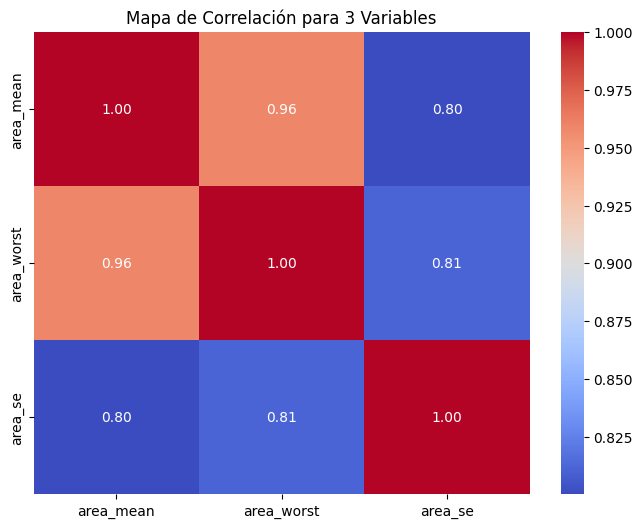

In [8]:
variables = ['area_mean', 'area_worst', 'area_se']
subset_df = df[variables]
correlation_matrix = subset_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación para 3 Variables')
plt.show()


Hay un gran número de pares de variables dependientes.  Interesa eliminar la multicolinealidad para trabajar con menos variables.  La mayor parte de variables de la lista son las que se refieren a la media de un valor.

Las variables que se eliminarán son las siguientes:   
  -radius_mean  
  -texture_mean    
  -area_se  
  -smoothness_mean   
  -concavity_mean  
  -concave points_mean  
  -radius_se  
  -perimeter_se  
  -area_worst   
  -compactness_se  
  -radius_worst  
  -perimeter_worst  
  -compactness_worst  
  -concavity_worst  

In [9]:
df = df_new.drop(columns=['radius_mean','texture_mean','area_worst','smoothness_mean','concavity_mean','concave points_mean','radius_se','perimeter_se','area_se','compactness_se','radius_worst','perimeter_worst','compactness_worst','concavity_worst'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   perimeter_mean           569 non-null    float64
 2   area_mean                569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   symmetry_mean            569 non-null    float64
 5   fractal_dimension_mean   569 non-null    float64
 6   texture_se               569 non-null    float64
 7   smoothness_se            569 non-null    float64
 8   concavity_se             569 non-null    float64
 9   concave points_se        569 non-null    float64
 10  symmetry_se              569 non-null    float64
 11  fractal_dimension_se     569 non-null    float64
 12  texture_worst            569 non-null    float64
 13  smoothness_worst         569 non-null    float64
 14  concave points_worst     5

Para simplificar los datos, se pasarán a categóricos con 3 valores las variables que midan área, perímetro y compacidad.

El área media oscila entre los valores 143.5 y 2501, respectivamente.  La media es 654.9.

In [10]:
print(df['area_mean'].describe())
print(df['perimeter_mean'].describe())
print(df['compactness_mean'].describe())

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64
count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64


In [11]:
bins = [142.5,450,780,2501]
labels = ['Baja', 'Media', 'Alta']
df['area_categorical'] = pd.cut(df['area_mean'], bins=bins, labels=labels)

In [12]:
bins = [42,75.17,104.1,188]
labels = ['Bajo', 'Medio', 'Alto']
df['perimeter_categorical'] = pd.cut(df['perimeter_mean'], bins=bins, labels=labels)

In [13]:
bins = [0.01937,0.06492,0.1304,0.3455]
labels = ['Baja', 'Media', 'Alta']
df['compactness_categorical'] = pd.cut(df['compactness_mean'], bins=bins, labels=labels)

In [14]:

#df = pd.get_dummies(df,columns =[ 'area_categorical','perimeter_categorical','compactness_categorical'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   perimeter_mean           569 non-null    float64 
 2   area_mean                569 non-null    float64 
 3   compactness_mean         569 non-null    float64 
 4   symmetry_mean            569 non-null    float64 
 5   fractal_dimension_mean   569 non-null    float64 
 6   texture_se               569 non-null    float64 
 7   smoothness_se            569 non-null    float64 
 8   concavity_se             569 non-null    float64 
 9   concave points_se        569 non-null    float64 
 10  symmetry_se              569 non-null    float64 
 11  fractal_dimension_se     569 non-null    float64 
 12  texture_worst            569 non-null    float64 
 13  smoothness_worst         569 non-null    float64 
 14  concave po

2) Modelos de clasificación.

ÁRBOL DE DECISIÓN

In [15]:
from sklearn.model_selection import train_test_split
y = df['diagnosis_encoded']
X = df.iloc[:,2:]
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

In [35]:
df_encoded = pd.get_dummies(df, columns=['area_categorical','compactness_categorical','perimeter_categorical'])
print(df_encoded.head())
y = df_encoded['diagnosis_encoded']
X = df_encoded.iloc[:,1:]
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)

         id  perimeter_mean  area_mean  compactness_mean  symmetry_mean  \
0    842302          122.80     1001.0           0.27760         0.2419   
1    842517          132.90     1326.0           0.07864         0.1812   
2  84300903          130.00     1203.0           0.15990         0.2069   
3  84348301           77.58      386.1           0.28390         0.2597   
4  84358402          135.10     1297.0           0.13280         0.1809   

   fractal_dimension_mean  texture_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053       0.006399       0.05373   
1                 0.05667      0.7339       0.005225       0.01860   
2                 0.05999      0.7869       0.006150       0.03832   
3                 0.09744      1.1560       0.009110       0.05661   
4                 0.05883      0.7813       0.011490       0.05688   

   concave points_se  ...  diagnosis_encoded  area_categorical_Baja  \
0            0.01587  ...                  1             

In [18]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[73  0]
 [ 0 41]]


En este tipo de problemas de la salud, suele buscarse minimizar los falsos negativos.

Tomando el resultado de este árbol de decisión: hay un 3% de falsos negativos con respecto a los positivos totales y hay casi un 7% de falsos positivos con respecto a los negativos totales.

In [19]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


La precisión es del 93%, muy buena.

Ahora se probará el método de clasificación K-Neatest Neighbours.

In [20]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Estadísticas
import scipy
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:


knn = KNeighborsClassifier(n_neighbors=12) #12 vecinos (k =12)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [37]:
print(X_train,y_train)
nansiono = X_train.isna().any()
X_test = X_test.dropna()
predicciones = knn.predict(X_test)
comparaciones = pd.DataFrame(X_test)
comparaciones = comparaciones.assign(Diagnosis_Real = y_test)
comparaciones = comparaciones.assign(Diagnosis_Pred = predicciones.flatten().tolist())

     perimeter_mean  area_mean  compactness_mean  symmetry_mean  \
42           128.30     1104.0           0.21900         0.2310   
498          121.30     1068.0           0.13170         0.1832   
537           76.37      406.4           0.15520         0.2131   
339          155.10     1747.0           0.12830         0.1797   
206           62.92      295.4           0.07232         0.1934   
..              ...        ...               ...            ...   
164          152.10     1686.0           0.11450         0.1801   
126           87.76      572.6           0.07862         0.1761   
441          112.40      928.8           0.11090         0.1467   
125           88.44      588.7           0.06136         0.1614   
377           85.89      562.1           0.04726         0.1421   

     fractal_dimension_mean  texture_se  smoothness_se  concavity_se  \
42                  0.06343      1.6660       0.006548      0.097230   
498                 0.06697      1.0450       0.007

In [38]:
print(confusion_matrix(comparaciones['Diagnosis_Real'], comparaciones['Diagnosis_Pred']))

[[64  2]
 [13 35]]


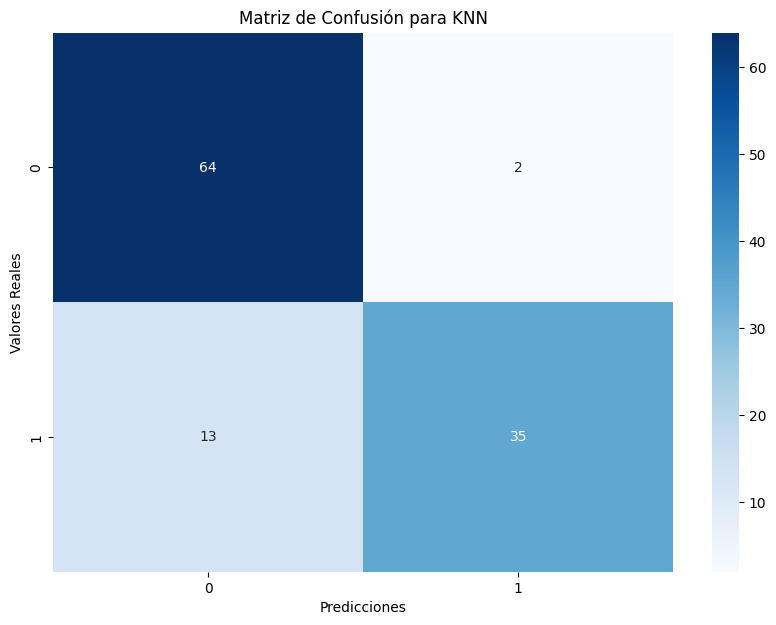

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Suponiendo que 'comparaciones' es tu DataFrame que ya contiene 'Diagnosis_Real' y 'Diagnosis_Pred'
matriz_conf = confusion_matrix(comparaciones['Diagnosis_Real'], comparaciones['Diagnosis_Pred'])

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión para KNN')
plt.show()


En este modelo de clasificación hay un número considerable de falsos negativos.  Hay un 11% aproximadamente de falsos negativos con respecto de los positivos totales y 0% de falsos positivos.  Esto es precisamente lo que no interesa en un modelo predictor de diagnósticos de tumores, pues es preferible que haya falsos positivos (que se diagnostique y no se tenga) a que haya falsos negativos (que se tenga y no se diagnostique).

In [39]:
print(classification_report(comparaciones['Diagnosis_Real'], comparaciones['Diagnosis_Pred']))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90        66
           1       0.95      0.73      0.82        48

    accuracy                           0.87       114
   macro avg       0.89      0.85      0.86       114
weighted avg       0.88      0.87      0.86       114



In [40]:
accuracy = accuracy_score(
    y_true = comparaciones['Diagnosis_Real'],
    y_pred = comparaciones['Diagnosis_Pred'],
    normalize = True
    )
print(f" El valor de exactitud = accuracy es de: {100 * accuracy} %")

 El valor de exactitud = accuracy es de: 86.8421052631579 %


La precisión es casi del 93%, casi como el anterior modelo.  Es ligeramente peor en cuanto a la precisión, pero ya que el modelo de árbol de decisión tiene mejor ejecución en cuanto a la minimización de falsos negativos, se puede decir que este es peor.

GRAFICAR KNN

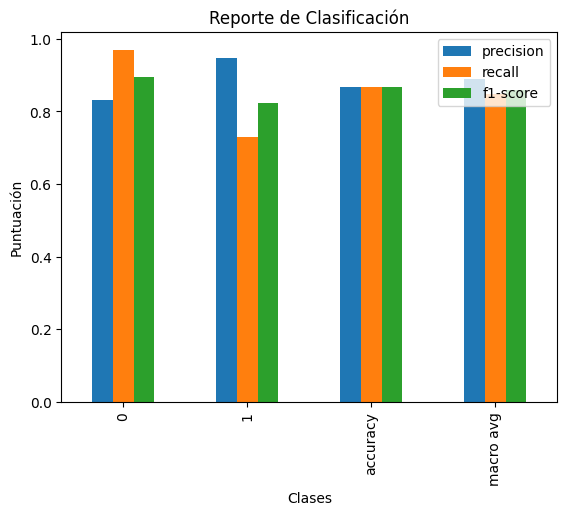

In [42]:

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Genera el reporte como un diccionario
report = classification_report(comparaciones['Diagnosis_Real'], comparaciones['Diagnosis_Pred'], output_dict=True)

# Convierte el diccionario a DataFrame
report_df = pd.DataFrame(report).transpose()

# Elimina la última fila que contiene los promedios/total
report_df = report_df[:-1]

# Grafica las métricas para cada clase
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Reporte de Clasificación')
plt.xlabel('Clases')
plt.ylabel('Puntuación')
plt.show()
